In [ ]:
import os

# Set up the root directory and plots directory for Jupyter Notebook
root_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))  # Move to the project root
plots_dir = os.path.join(root_dir, "plots")

# Ensure the plots directory exists
os.makedirs(plots_dir, exist_ok=True)
print(f"Plots will be saved in: {plots_dir}")



In [ ]:
import pandas as pd

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')

# Verify the data
print("Data Info:")
print(cleaned_data.info())  # Check the structure and missing values
print("\nSample Data:")
print(cleaned_data.head())  # View first few rows
  # View first few rows


In [ ]:
import pandas as pd

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')

# Display the first few rows to confirm loading
print(cleaned_data.head())


In [34]:
import pandas as pd

# Load the raw data
data_path = 'src/data.csv'  # Make sure this path is correct
raw_data = pd.read_csv(data_path)


In [ ]:
# Drop rows with missing headline, publisher, or date
cleaned_data = raw_data.dropna(subset=['headline', 'publisher', 'date'])

# Standardize text fields (e.g., strip extra spaces, lowercase publisher)
cleaned_data['headline'] = cleaned_data['headline'].str.strip()
cleaned_data['publisher'] = cleaned_data['publisher'].str.lower()


# Convert the 'date' column to datetime format with proper handling
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], errors='coerce', utc=True)


# Drop rows where 'date' could not be parsed
cleaned_data = cleaned_data.dropna(subset=['date'])
print(f"Data shape after fixing 'date': {cleaned_data.shape}")


# Drop duplicates
cleaned_data = cleaned_data.drop_duplicates()

# Check the cleaned data
print("Cleaned Data Info:")
print(cleaned_data.info())


In [ ]:
# Save the cleaned dataset to a CSV file
cleaned_data.to_csv('src/cleaned_data.csv', index=False)
print("Cleaned data saved to 'src/cleaned_data.csv'")


In [ ]:
# Clean and standardize text fields
raw_data['headline'] = raw_data['headline'].str.strip()
raw_data['publisher'] = raw_data['publisher'].str.lower().str.strip()


In [ ]:
# Save cleaned data to a new file
raw_data.to_csv('src/cleaned_data.csv', index=False)
print("Cleaned data saved to 'src/cleaned_data.csv'")


In [ ]:
cleaned_data = pd.read_csv('src/cleaned_data.csv')
print(cleaned_data.info())
print(cleaned_data.head())


In [9]:
data_path = os.path.join(os.getcwd(), '..', 'src', 'data.csv')


In [10]:
data_path = 'C:/Users/Hp/Music/Projectss/week 1/src/data.csv'


In [11]:
os.chdir('C:/Users/Hp/Music/Projectss/week 1/')


In [ ]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure 'plots' directory exists
plots_dir = 'plots'  # Relative path to the 'plots' directory
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Headline lengths
cleaned_data['headline_length'] = cleaned_data['headline'].apply(len)
print("Headline Length Statistics:")
print(cleaned_data['headline_length'].describe())

# Articles per publisher
publisher_counts = cleaned_data['publisher'].value_counts()
print("\nTop Publishers by Article Count:")
print(publisher_counts.head(10))

# Publication trends over time
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], utc=True)  # Ensure 'date' is datetime
cleaned_data['publication_date'] = cleaned_data['date'].dt.date
date_counts = cleaned_data['publication_date'].value_counts().sort_index()

# Plot publication trends
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Publication Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# Save the plot in the 'plots' directory
plt.savefig(os.path.join(plots_dir, 'publication_trends.png'))  # Save the plot
plt.show()


In [ ]:
# Import necessary libraries for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'headline' column
cleaned_data['sentiment_score'] = cleaned_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on the score
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

cleaned_data['sentiment'] = cleaned_data['sentiment_score'].apply(classify_sentiment)

# View the first few rows with sentiment classifications
cleaned_data[['headline', 'sentiment']].head()


In [ ]:
from textblob import TextBlob
import pandas as pd

# Assuming 'cleaned_data' is the DataFrame containing the news headlines

# Function to calculate sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Sentiment polarity score (-1 to 1)
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis on the 'headline' column
cleaned_data['sentiment'] = cleaned_data['headline'].apply(get_sentiment)

# Add a sentiment score for visualization
cleaned_data['sentiment_score'] = cleaned_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Show the sentiment breakdown
print(cleaned_data['sentiment'].value_counts())

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['sentiment_score'], kde=True, bins=30)
plt.title('Sentiment Score Distribution of Headlines')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Sample data (headlines)
documents = [
    "FDA approval boosts shares",
    "Price targets raised for companies",
    "New reports on earnings growth",
    "Stocks increase ahead of market close",
    "Reports show strong quarterly performance"
]

# Step 1: Vectorize the documents
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Step 2: Train the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Step 3: Get the top words from each topic
def get_top_words(lda_model, vectorizer, n_top_words=10):
    terms = vectorizer.get_feature_names_out()
    topic_words = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[-n_top_words:][::-1]
        top_words = [terms[i] for i in top_indices]
        topic_words.append(top_words)
    return topic_words

n_top_words = 10  # Display top 10 words
topic_words = get_top_words(lda_model, vectorizer, n_top_words)

# Step 4: Plot the top words for each topic
num_topics = len(topic_words)
fig, axes = plt.subplots(num_topics, 1, figsize=(10, 6 * num_topics))

for i, top_words in enumerate(topic_words):
    axes[i].barh(range(len(top_words)), [1] * len(top_words), align='center')
    axes[i].set_yticks(range(len(top_words)))
    axes[i].set_yticklabels(top_words)
    axes[i].set_xlabel('Frequency')
    axes[i].set_title(f'Topic {i + 1}')

plt.tight_layout()
plt.show()

num_topics = len(topic_words)
fig, axes = plt.subplots(num_topics, 1, figsize=(10, 6 * num_topics))

for i, top_words in enumerate(topic_words):
    axes[i].barh(range(len(top_words)), [1] * len(top_words), align='center')
    axes[i].set_yticks(range(len(top_words)))
    axes[i].set_yticklabels(top_words)
    axes[i].set_xlabel('Frequency')
    axes[i].set_title(f'Topic {i + 1}')

plt.tight_layout()
plt.show()



In [ ]:
# Import necessary libraries for topic modeling
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

# Preprocess headlines: remove stopwords
stop_words = set(stopwords.words('english'))
cleaned_data['processed_headline'] = cleaned_data['headline'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

# Vectorize the headlines using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['processed_headline'])

# Apply LDA for topic modeling
num_topics = 5  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

# Display the topics
terms = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))  # Display top 10 words for each topic
    print("\n")


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def calculate_sentiment(headline):
    sentiment_score = sia.polarity_scores(headline)
    return sentiment_score['compound']

# Apply sentiment analysis to the 'headline' column
cleaned_data['sentiment_score'] = cleaned_data['headline'].apply(calculate_sentiment)

# Save the data with sentiment scores
cleaned_data.to_csv('src/cleaned_data_with_sentiment.csv', index=False)

# Check the output
print("Sentiment Analysis Results:")
print(cleaned_data[['headline', 'sentiment_score']].head())





C:\Users\Hp\AppData\Local\Temp\ipykernel_5244\3763123303.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_publications = cleaned_data.resample('M').size()


Saved: plots\article_publications_over_time.png


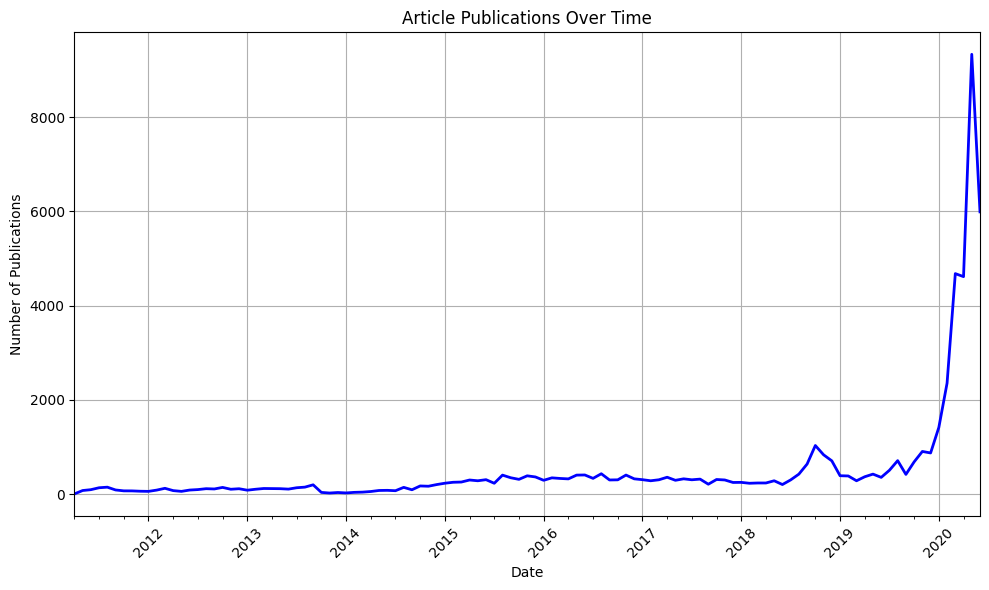

Spikes in publication frequency:
 date
2011-05-31 00:00:00-04:00      78
2014-08-31 00:00:00-04:00     145
2014-10-31 00:00:00-04:00     175
2015-08-31 00:00:00-04:00     405
2015-11-30 00:00:00-04:00     390
2016-02-29 00:00:00-04:00     347
2016-05-31 00:00:00-04:00     405
2016-08-31 00:00:00-04:00     434
2016-11-30 00:00:00-04:00     406
2017-04-30 00:00:00-04:00     360
2017-10-31 00:00:00-04:00     312
2018-07-31 00:00:00-04:00     303
2018-08-31 00:00:00-04:00     426
2018-09-30 00:00:00-04:00     640
2018-10-31 00:00:00-04:00    1033
2019-04-30 00:00:00-04:00     370
2019-05-31 00:00:00-04:00     426
2019-07-31 00:00:00-04:00     508
2019-08-31 00:00:00-04:00     712
2019-10-31 00:00:00-04:00     686
2019-11-30 00:00:00-04:00     907
2020-01-31 00:00:00-04:00    1417
2020-02-29 00:00:00-04:00    2356
2020-03-31 00:00:00-04:00    4680
2020-05-31 00:00:00-04:00    9333
dtype: int64


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')

# Convert 'date' to datetime format if not already
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], errors='coerce')

# Set the 'date' column as the index for time series analysis
cleaned_data.set_index('date', inplace=True)

# Resample the data to get the number of articles per month
monthly_publications = cleaned_data.resample('M').size()

# Plot the number of publications per month
plt.figure(figsize=(10, 6))
monthly_publications.plot(kind='line', color='b', linewidth=2)
plt.title('Article Publications Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
monthly_publications_plot_path = os.path.join(plots_dir, 'article_publications_over_time.png')
plt.savefig(monthly_publications_plot_path)
print(f"Saved: {monthly_publications_plot_path}")

# Show the plot
plt.show()

# Optionally: Check for spikes or significant changes in publication counts
# For example, you can check for large increases in publication frequency in certain periods
spikes = monthly_publications[monthly_publications.diff() > 50]  # adjust the threshold as needed
print("Spikes in publication frequency:\n", spikes)


Saved: plots\hourly_publications_distribution.png


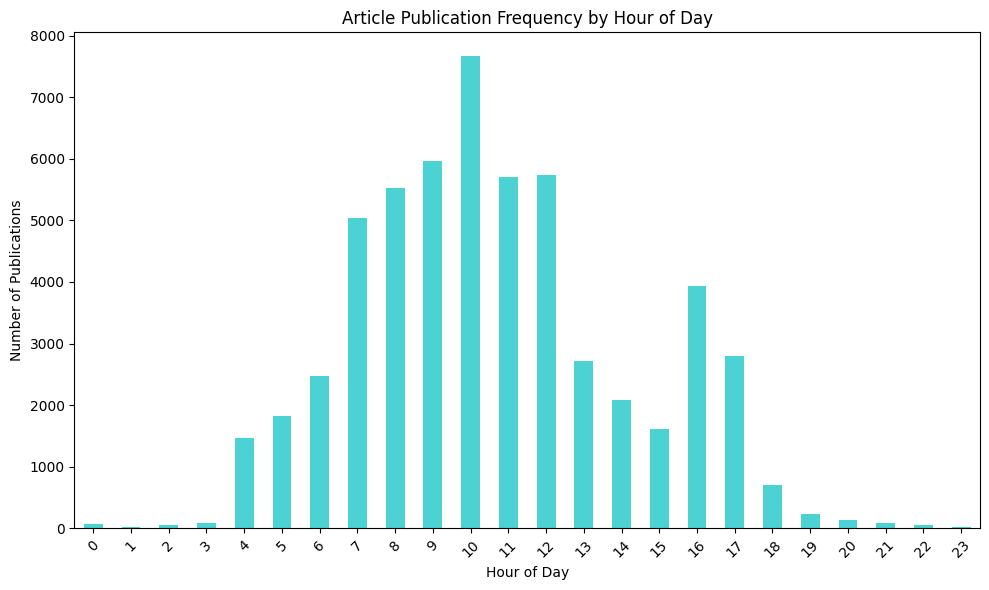

In [57]:
# Extract hour from the 'date' column
cleaned_data['hour'] = cleaned_data.index.hour

# Plot distribution of publications by hour of the day
hourly_distribution = cleaned_data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_distribution.plot(kind='bar', color='c', alpha=0.7)
plt.title('Article Publication Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
hourly_distribution_plot_path = os.path.join(plots_dir, 'hourly_publications_distribution.png')
plt.savefig(hourly_distribution_plot_path)
print(f"Saved: {hourly_distribution_plot_path}")

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data with sentiment scores
cleaned_data_with_sentiment = pd.read_csv('src/cleaned_data_with_sentiment.csv')

# Create the plots directory if it doesn't exist
plots_dir = 'plots'  # Relative path to the 'plots' directory
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data_with_sentiment['sentiment_score'], kde=True, bins=30)
plt.title('Sentiment Score Distribution of Headlines')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Save the plot in the plots folder
plt.savefig(os.path.join(plots_dir, 'sentiment_score_distribution.png'))

# Display the plot
plt.show()


In [15]:
# Save the sentiment results to a new CSV
cleaned_data_with_sentiment.to_csv('src/cleaned_data_with_sentiment.csv', index=False)


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')  # Adjust path if necessary

# Preprocess the text (remove stopwords)
stop_words = set(stopwords.words('english'))
cleaned_data['processed_headline'] = cleaned_data['headline'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

# Check the first few rows of the cleaned data
cleaned_data.head()


In [4]:
import os
os.chdir('..')  # Moves to the project root directory



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the headlines using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['processed_headline'])



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Perform LDA for topic modeling
n_topics = 5  # Number of topics you want to extract
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Extract topics and their words
n_top_words = 10  # Number of words per topic
feature_names = tfidf_vectorizer.get_feature_names_out()
topics = []

for topic_idx, topic in enumerate(lda_model.components_):
    topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    topics.append(f"Topic {topic_idx + 1}: " + " ".join(topic_words))

# Output the topics
for topic in topics:
    print(topic)


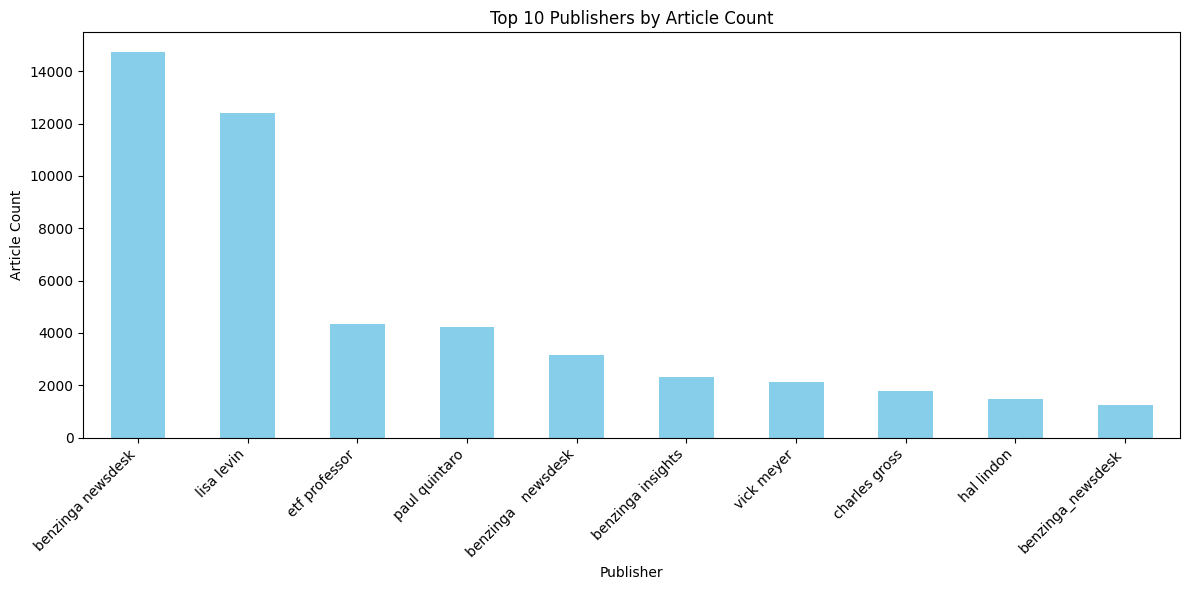

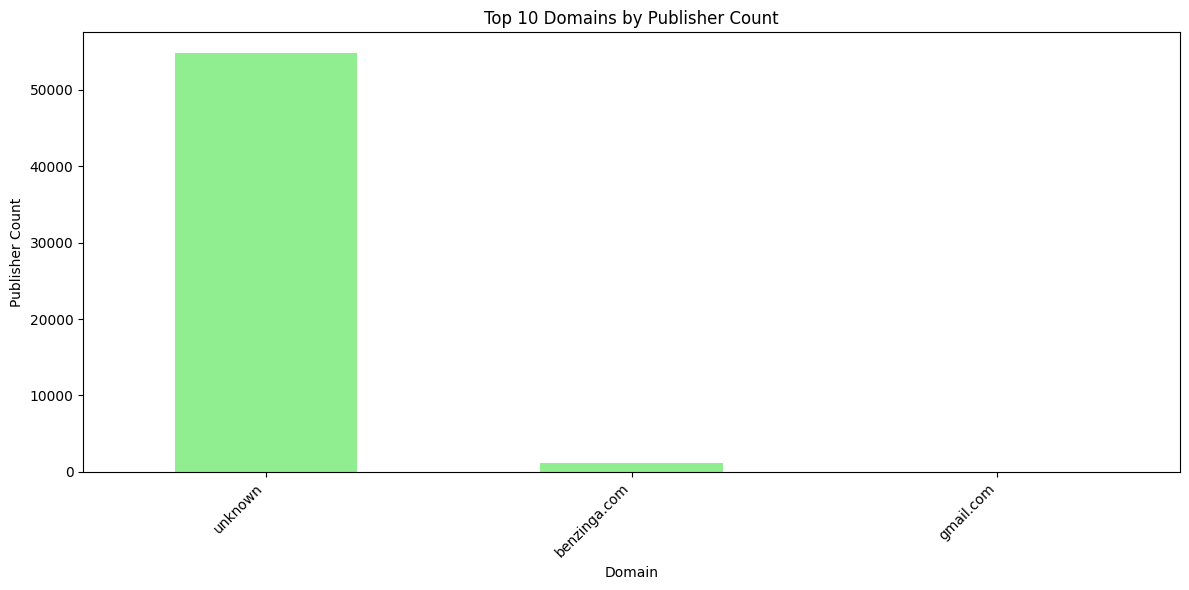

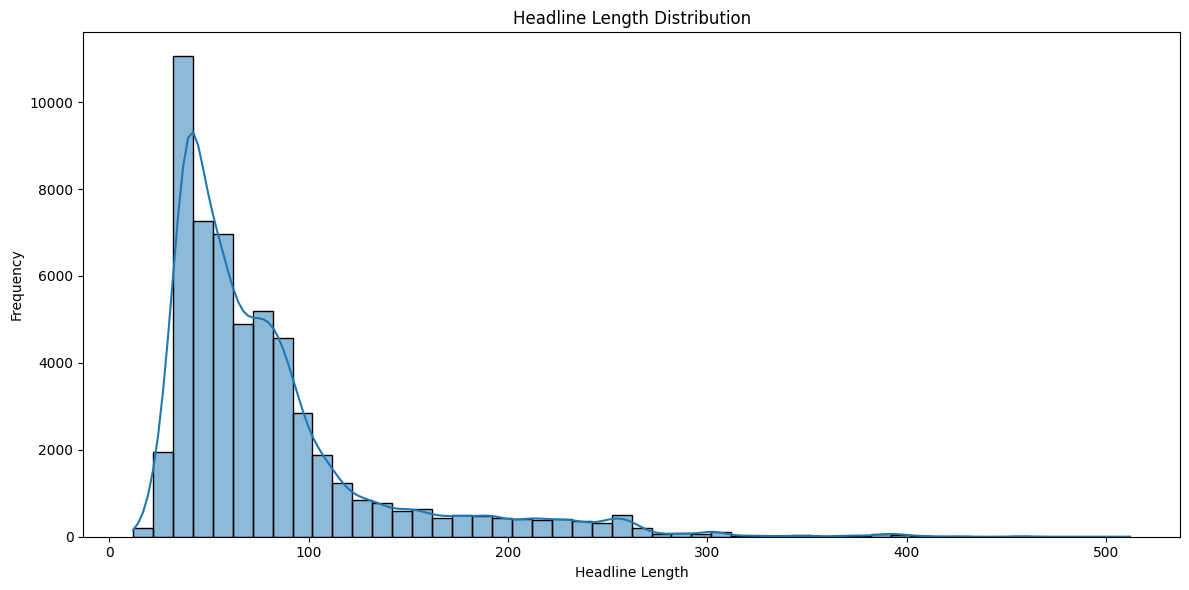

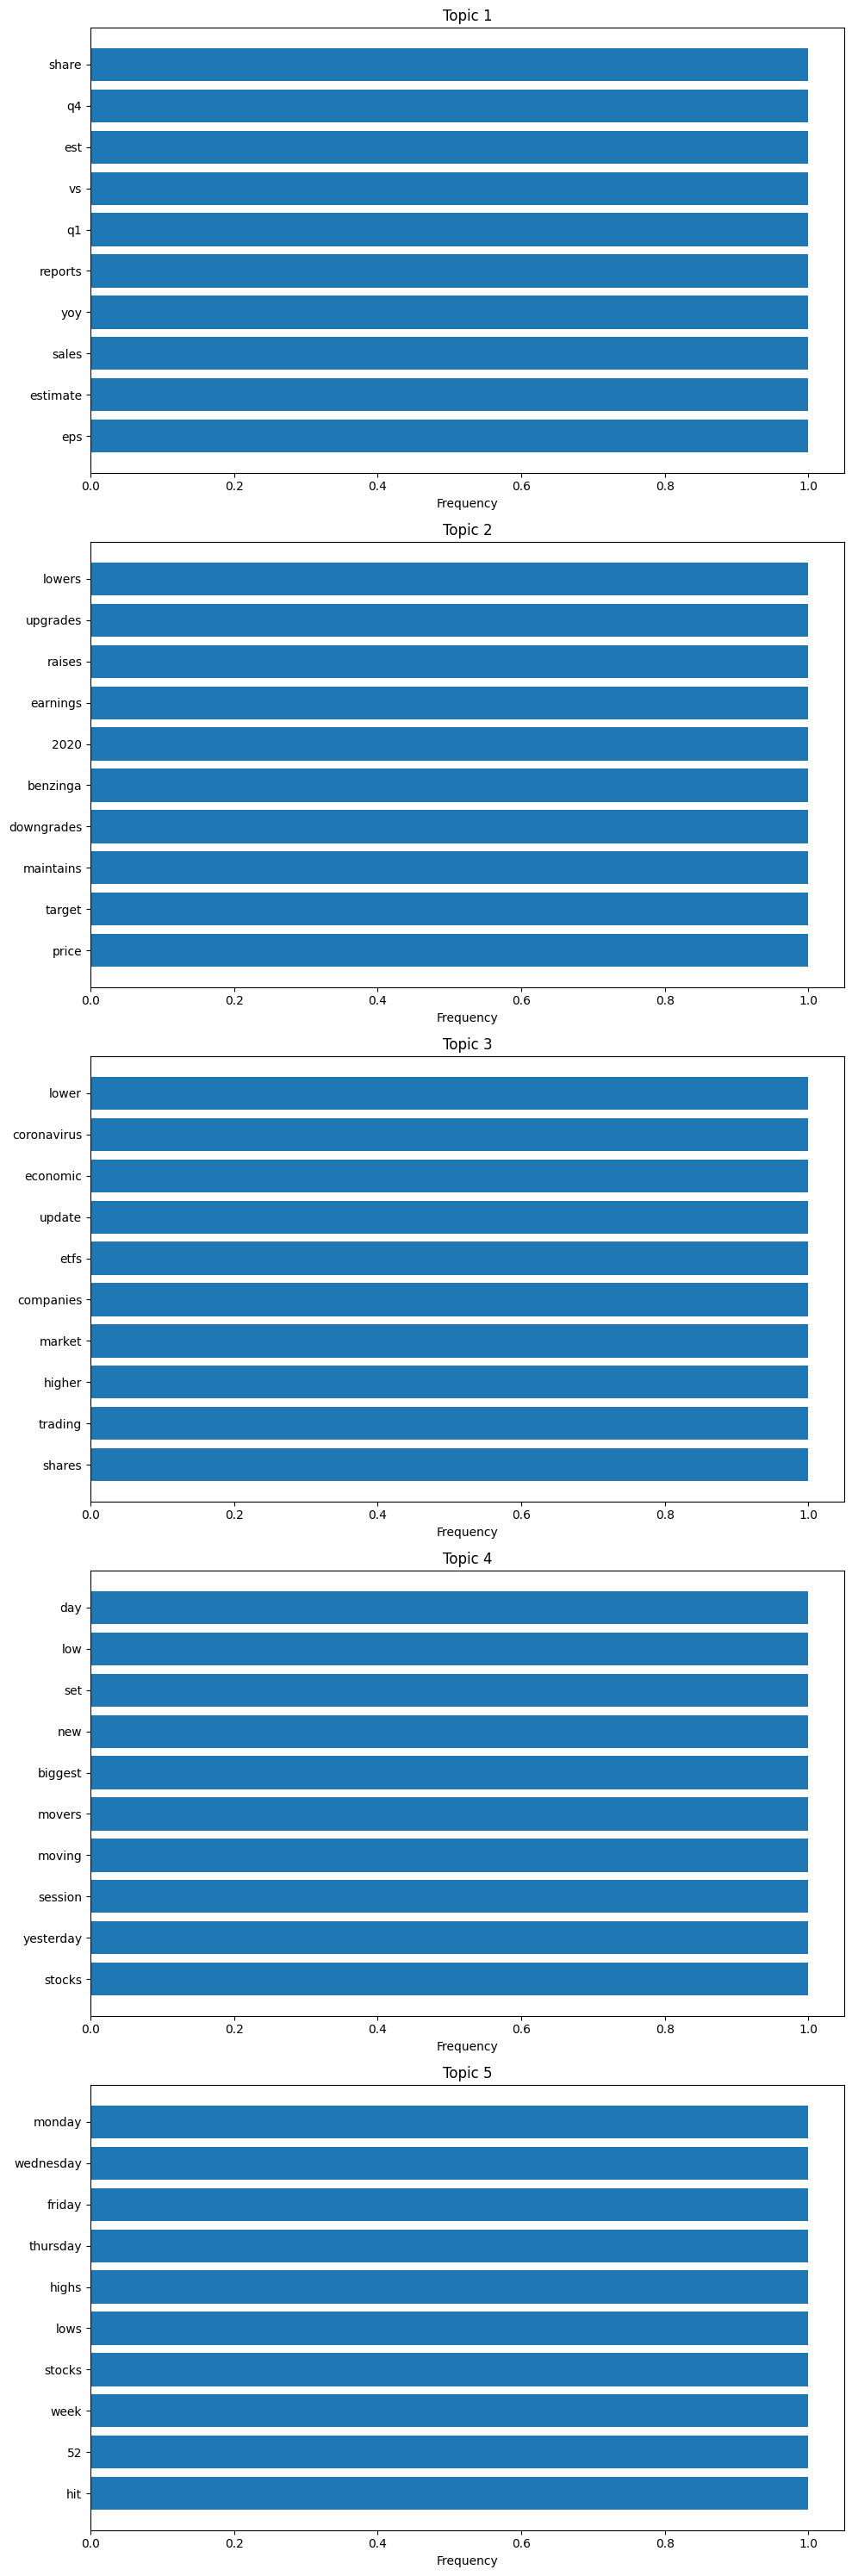

Saved: c:\Users\Hp\Music\Projectss\week 1\outputs\topic_modeling_results.txt
Saved: c:\Users\Hp\Music\Projectss\week 1\outputs\sentiment_analysis_results.txt
Saved: c:\Users\Hp\Music\Projectss\week 1\outputs\publisher_counts.txt
Saved: c:\Users\Hp\Music\Projectss\week 1\outputs\domain_counts.txt


In [3]:
# Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import re

# Define file paths
root_dir = os.path.abspath("../")  # Adjust if necessary
src_dir = os.path.join(root_dir, "src")
plots_dir = os.path.join(root_dir, "plots")
outputs_dir = os.path.join(root_dir, "outputs")
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(outputs_dir, exist_ok=True)

# Load the data
data_path = os.path.join(src_dir, 'cleaned_data.csv')
raw_data = pd.read_csv(data_path)

# Clean data
cleaned_data = raw_data.dropna(subset=['headline', 'publisher', 'date'])
cleaned_data['headline'] = cleaned_data['headline'].str.strip()
cleaned_data['publisher'] = cleaned_data['publisher'].str.lower()
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], errors='coerce')
cleaned_data = cleaned_data.dropna(subset=['date']).drop_duplicates()

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
cleaned_data['sentiment_score'] = cleaned_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Topic Modeling with LDA
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_data['headline'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Get topic words
terms = vectorizer.get_feature_names_out()
n_top_words = 10
topic_words = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_indices = topic.argsort()[-n_top_words:][::-1]
    topic_words.append([terms[i] for i in top_indices])

# Publisher Analysis
publisher_counts = cleaned_data['publisher'].value_counts()
top_publishers = publisher_counts.head(10)

# Publisher Domain Extraction
def extract_domain(publisher):
    match = re.search(r'@([a-zA-Z0-9.-]+)', publisher)
    return match.group(1) if match else 'unknown'

cleaned_data['publisher_domain'] = cleaned_data['publisher'].apply(extract_domain)
domain_counts = cleaned_data['publisher_domain'].value_counts()
top_domains = domain_counts.head(10)

# Visualization: Top 10 Publishers by Article Count
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'top_publishers.png'))
plt.show()

# Visualization: Top 10 Domains by Publisher Count
plt.figure(figsize=(12, 6))
domain_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Domains by Publisher Count')
plt.xlabel('Domain')
plt.ylabel('Publisher Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'top_domains.png'))
plt.show()

# Visualization: Headline Length Distribution
cleaned_data['headline_length'] = cleaned_data['headline'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data['headline_length'], bins=50, kde=True)
plt.title('Headline Length Distribution')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'headline_length_distribution.png'))
plt.show()

# Visualization: Topic Words from LDA
fig, axes = plt.subplots(len(topic_words), 1, figsize=(10, 6 * len(topic_words)))
for i, top_words in enumerate(topic_words):
    axes[i].barh(range(len(top_words)), [1] * len(top_words), align='center')
    axes[i].set_yticks(range(len(top_words)))
    axes[i].set_yticklabels(top_words)
    axes[i].set_xlabel('Frequency')
    axes[i].set_title(f'Topic {i + 1}')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'topic_words.png'))
plt.show()

# Saving the results to the outputs directory
topic_modeling_path = os.path.join(outputs_dir, 'topic_modeling_results.txt')
with open(topic_modeling_path, 'w', encoding='utf-8') as f:  # Set encoding to 'utf-8'
    f.write("Top Words from each Topic:\n")
    for idx, words in enumerate(topic_words):
        f.write(f"Topic {idx+1}: {', '.join(words)}\n")
print(f"Saved: {topic_modeling_path}")

# Saving the sentiment analysis results
sentiment_analysis_path = os.path.join(outputs_dir, 'sentiment_analysis_results.txt')
with open(sentiment_analysis_path, 'w', encoding='utf-8') as f:  # Set encoding to 'utf-8'
    f.write("Sentiment Analysis Results (headline and sentiment score):\n")
    f.write(str(cleaned_data[['headline', 'sentiment_score']].head()))
print(f"Saved: {sentiment_analysis_path}")

# Saving the top publishers and domains analysis results
publisher_counts_path = os.path.join(outputs_dir, 'publisher_counts.txt')
with open(publisher_counts_path, 'w', encoding='utf-8') as f:  # Set encoding to 'utf-8'
    f.write("Top 10 Publishers by Article Count:\n")
    f.write(str(top_publishers))
print(f"Saved: {publisher_counts_path}")

domain_counts_path = os.path.join(outputs_dir, 'domain_counts.txt')
with open(domain_counts_path, 'w', encoding='utf-8') as f:  # Set encoding to 'utf-8'
    f.write("Top 10 Domains by Publisher Count:\n")
    f.write(str(top_domains))
print(f"Saved: {domain_counts_path}")


In [92]:
print(repr(data_path))


'C:\\Users\\Hp\\Music\\Projectss\\src\\cleaned_data.csv'


In [76]:
data_path = 'C:\\Users\\Hp\\Music\\Projectss\\week 1\\src\\data.csv'
raw_data = pd.read_csv(data_path)







In [29]:
# Save the topics to a CSV
topic_df = pd.DataFrame(topics, columns=['Topic'])
topic_df.to_csv('src/topics.csv', index=False)


In [ ]:
file_path = os.path.join(os.getcwd(), '..', 'src', 'cleaned_data.csv')
print("Checking file path:", file_path)
print("File exists:", os.path.exists(file_path))


